Imports and Setups


In [1]:
import os
from pathlib import Path
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

DataSet Paths

In [2]:
DATA_DIR = Path("../data/raw")
TRAIN_DIR = DATA_DIR / "training"
VAL_DIR = DATA_DIR / "validation"
TEST_DIR = DATA_DIR / "evaluation"
print("Train path exists: ", TRAIN_DIR.exists())
print("Val path exists: ", VAL_DIR.exists())
print("Test path exists: ", TEST_DIR.exists())

Train path exists:  True
Val path exists:  True
Test path exists:  True


Class Mapping

In [6]:
class_dirs = sorted([d for d in TRAIN_DIR.iterdir() if d.is_dir()])

class_names = [cls.name for cls in class_dirs]

class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}
idx_to_class = {idx: class_name for class_name, idx in class_to_idx.items()}

print("Number of classes:", len(class_to_idx))
print("Class mapping:", class_to_idx)

Number of classes: 11
Class mapping: {'Bread': 0, 'Dairy product': 1, 'Dessert': 2, 'Egg': 3, 'Fried food': 4, 'Meat': 5, 'Noodles-Pasta': 6, 'Rice': 7, 'Seafood': 8, 'Soup': 9, 'Vegetable-Fruit': 10}


Count Images per class

In [ ]:
def count_images_per_class(directory):
    counts = {}
    for cls in sorted(directory.iterdir()):
        if cls.is_dir():
            counts[cls.name] = len(list(cls.glob("*")))
    return counts
train_counts = count_images_per_class(TRAIN_DIR)
val_counts = count_images_per_class(VAL_DIR)
test_counts = count_images_per_class(TEST_DIR)
# print(test_counts)   

# total_count = train_counts + val_counts + total_counts
df = pd.DataFrame({
    "train": train_counts,
    "validation": val_counts,
    "test": test_counts,
    # "total": total_count
})
df

{'Bread': 368, 'Dairy product': 148, 'Dessert': 500, 'Egg': 335, 'Fried food': 287, 'Meat': 432, 'Noodles-Pasta': 147, 'Rice': 96, 'Seafood': 303, 'Soup': 500, 'Vegetable-Fruit': 231}


,train,validation,test
Bread,994,362,368
Dairy product,429,144,148
Dessert,1500,500,500
Egg,986,327,335
Fried food,848,326,287
Meat,1325,449,432
Noodles-Pasta,440,147,147
Rice,280,96,96
Seafood,855,347,303
Soup,1500,500,500


Visualize class distribution

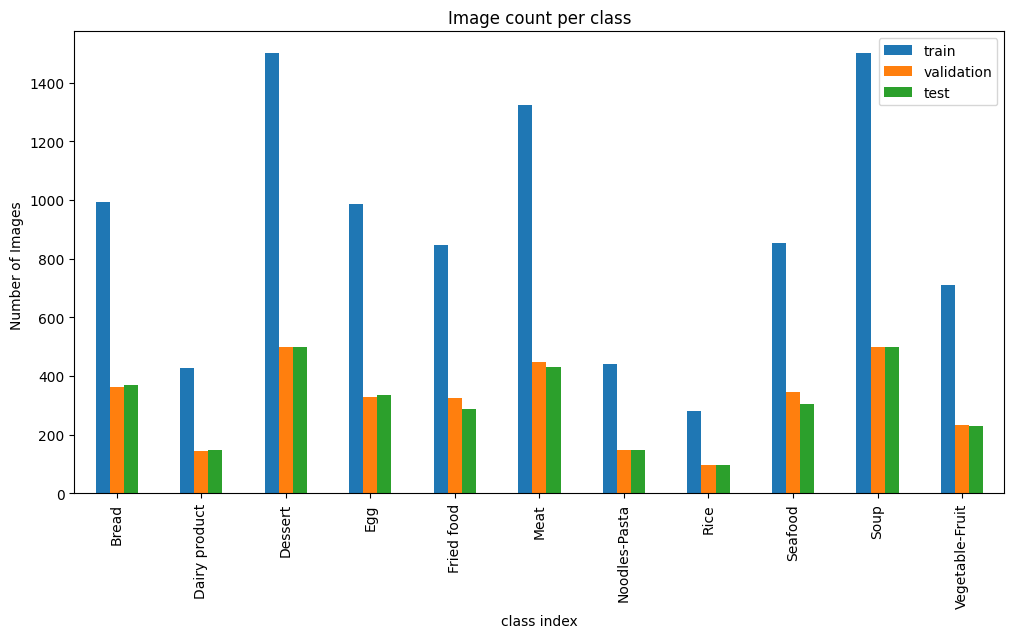

In [15]:
df.plot(kind="bar", figsize=(12,6))
plt.title("Image count per class")
plt.ylabel("Number of Images ")
plt.xlabel("class index")
plt.show()

Show Sample Images

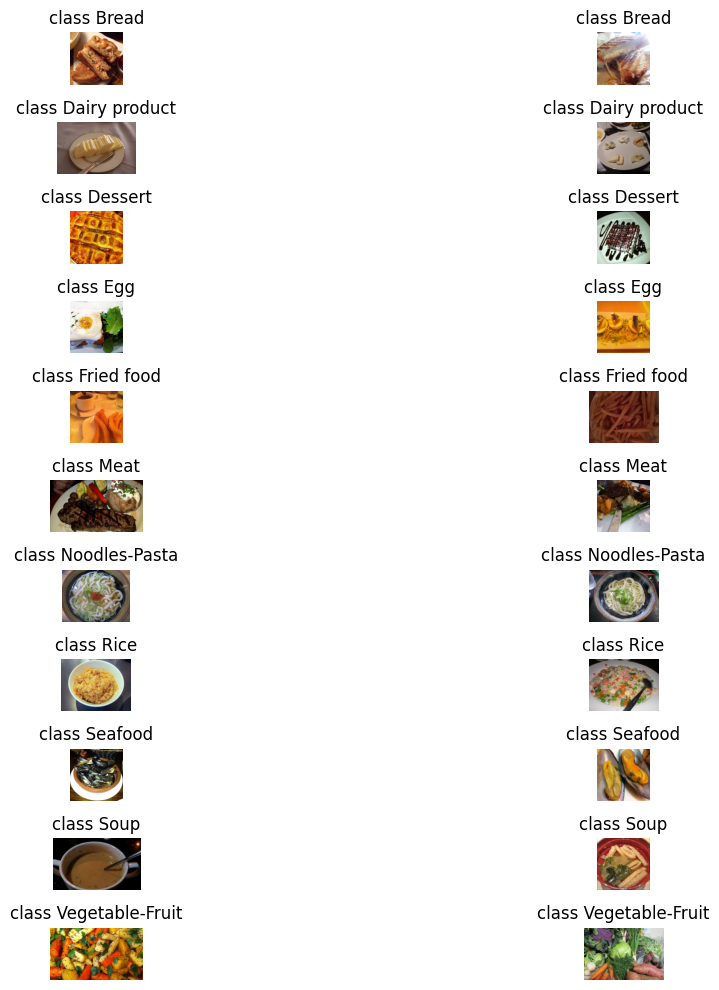

In [16]:
def show_samples(directory, samples_per_class=2):
    plt.figure(figsize=(15, 10))
    i = 1
    for cls in sorted(directory.iterdir()):
        if not cls.is_dir():
            continue
        images = list(cls.glob("*"))
        selected_images = random.sample(images, samples_per_class)
        for img_path in selected_images:
            img = Image.open(img_path)
            plt.subplot(len(class_dirs), samples_per_class, i)
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"class {cls.name}")
            i += 1
    plt.tight_layout()
    plt.show()
show_samples(TRAIN_DIR, samples_per_class = 2)

Inspect image Properties

Image path: ../data/raw/training/Egg/840.jpg
Image size (W, H): (512, 512)
Image mode: RGB


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

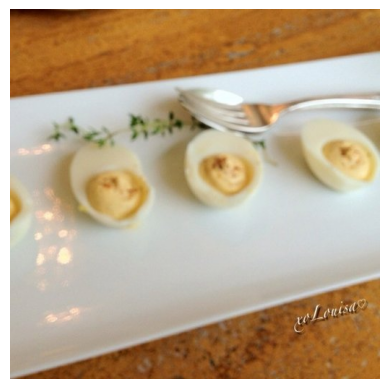

In [17]:
sample_class = random.choice(class_dirs)
sample_image_path = random.choice(list(sample_class.glob("*")))

img = Image.open(sample_image_path)

print("Image path:", sample_image_path)
print("Image size (W, H):", img.size)
print("Image mode:", img.mode)

plt.imshow(img)
plt.axis("off")

In [18]:
total_images = df.sum().sum()
total_images

np.int64(16643)